In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown

# Step 1: Download the CSV file from Google Drive
file_id = "1Q-mhurRJJd0sI7f_cBCeRy74T391OMgG"  # Replace with your actual file ID
file_name = "weather_prediction_dataset.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_name, quiet=False)

# Step 2: Load the CSV into a DataFrame
df = pd.read_csv(file_name)

# Step 3: Show basic dataset information
print("Dataset shape:", df.shape)
print("Column names:", df.columns.tolist())
print(df.head())


Downloading...
From: https://drive.google.com/uc?id=1Q-mhurRJJd0sI7f_cBCeRy74T391OMgG
To: /content/weather_prediction_dataset.csv
100%|██████████| 2.77M/2.77M [00:00<00:00, 99.5MB/s]


Dataset shape: (3654, 165)
Column names: ['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_max', 'DE_BILT_cloud_cover', 'DE_BILT_wind_speed', 'DE_BILT_wind_gust', 'DE_BILT_humidity', 'DE_BILT_pressure', 'DE_BILT_global_radiation', 'DE_BILT_precipitation', 'DE_BILT_sunshine', 'DE_BILT_temp_mean', 'DE_BILT_temp_min', 'DE_BILT_temp_max', 'DRESDEN_cloud_cover', 'DRESDEN_wind_speed', 'DRESDEN_wind_gust', 'DRESDEN_humidity', 'DRESDEN_global_radiation', 'DRESDEN_precipitation', 'DRESDEN_sunshine', 'DRESDEN_temp_mean', 'DRESDEN_temp_min', 'DRESDEN_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_wind_gust', 'DUSSELDORF_humidity', 'DUSSELDORF_pressur

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 4: Filter columns related to specific French cities
df_france = df.loc[:, df.columns.str.contains("Montelimar|Perpignan|Tours", case=False)]

# Step 5: Split train and test data
df_france_train = df_france.iloc[0:3288, :].copy()
df_france_test = df_france.iloc[3288:3653, :].copy()
df_france_test.reset_index(drop=True, inplace=True)

# Step 6: Fit MinMaxScaler on training data and transform both train and test
scaler = MinMaxScaler()
df_france_train_scaled = pd.DataFrame(scaler.fit_transform(df_france_train), columns=df_france_train.columns)
df_france_test_scaled = pd.DataFrame(scaler.transform(df_france_test), columns=df_france_test.columns)

# Show result
print("Train shape:", df_france_train_scaled.shape)
print("Test shape:", df_france_test_scaled.shape)


Train shape: (3288, 24)
Test shape: (365, 24)


In [ ]:
import numpy as np

# Define sliding window function
def sliding_window(df, window_size, stride=1):
    """
    Apply a sliding window transformation on a DataFrame.

    Parameters:
    df : pd.DataFrame - Input data
    window_size : int - Number of past time steps per sample
    stride : int - Step size for moving the window

    Returns:
    np.array - 3D array of shape (num_samples, window_size, num_features)
    """
    n = df.shape[1]
    num_samples = (df.shape[0] - window_size) // stride + 1
    data = df.values
    windows = np.lib.stride_tricks.sliding_window_view(data, (window_size, n))
    windows = windows.reshape(num_samples, window_size, n)
    windows = windows[::stride]
    return windows

# Apply sliding window
X_train = sliding_window(df_france_train_scaled, window_size=5, stride=1)
X_test = sliding_window(df_france_test_scaled, window_size=5, stride=1)

# Create corresponding labels (next value after window)
y_train = df_france_train_scaled.iloc[4:, :].reset_index(drop=True)
y_test = df_france_test_scaled.iloc[4:, :].reset_index(drop=True)

# Show dimensions
print("X_train shape =", X_train.shape)
print("y_train shape =", y_train.shape)
print("X_test shape  =", X_test.shape)
print("y_test shape  =", y_test.shape)


X_train shape = (3284, 5, 24)
y_train shape = (3284, 24)
X_test shape  = (361, 5, 24)
y_test shape  = (361, 24)


In [ ]:
# Extract columns related to Perpignan
perpignan_columns = df_france_train_scaled.columns[df_france_train_scaled.columns.str.contains("Perpignan", case=False)]

# Apply sliding window on Perpignan columns only
X_train = sliding_window(df_france_train_scaled[perpignan_columns], window_size=5, stride=1)
X_test = sliding_window(df_france_test_scaled[perpignan_columns], window_size=5, stride=1)

# Create labels (day after window)
y_train = df_france_train_scaled[perpignan_columns].iloc[4:].reset_index(drop=True)
y_test = df_france_test_scaled[perpignan_columns].iloc[4:].reset_index(drop=True)

# Show dimensions
print("X_train shape =", X_train.shape)
print("y_train shape =", y_train.shape)
print("X_test shape  =", X_test.shape)
print("y_test shape  =", y_test.shape)


X_train shape = (3284, 5, 8)
y_train shape = (3284, 8)
X_test shape  = (361, 5, 8)
y_test shape  = (361, 8)


[LR=1.0] Epoch 1 - Train Loss: 0.0264 | Test Loss: 0.0111


[LR=1.0] Epoch 20 - Train Loss: 0.0015 | Test Loss: 0.0019


[LR=1.0] Epoch 40 - Train Loss: 0.0011 | Test Loss: 0.0010


[LR=1.0] Epoch 60 - Train Loss: 0.0009 | Test Loss: 0.0014


[LR=1.0] Epoch 80 - Train Loss: 0.0005 | Test Loss: 0.0004


[LR=1.0] Epoch 100 - Train Loss: 0.0006 | Test Loss: 0.0003


[LR=1.0] Epoch 120 - Train Loss: 0.0006 | Test Loss: 0.0012


[LR=1.0] Epoch 140 - Train Loss: 0.0005 | Test Loss: 0.0003


[LR=1.0] Epoch 160 - Train Loss: 0.0003 | Test Loss: 0.0004


[LR=1.0] Epoch 180 - Train Loss: 0.0004 | Test Loss: 0.0005


[LR=1.0] Epoch 200 - Train Loss: 0.0001 | Test Loss: 0.0003


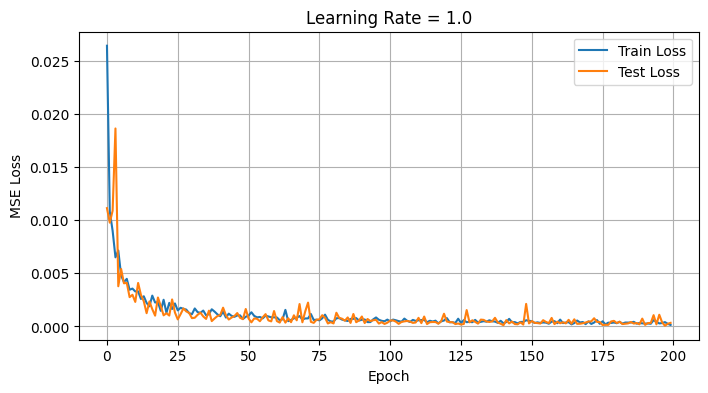

Final Train Loss: 0.000133
Final Test Loss: 0.000333


[LR=0.001] Epoch 1 - Train Loss: 0.2363 | Test Loss: 0.2213


[LR=0.001] Epoch 20 - Train Loss: 0.0387 | Test Loss: 0.0374


[LR=0.001] Epoch 40 - Train Loss: 0.0268 | Test Loss: 0.0262


[LR=0.001] Epoch 60 - Train Loss: 0.0251 | Test Loss: 0.0246


[LR=0.001] Epoch 80 - Train Loss: 0.0238 | Test Loss: 0.0233


[LR=0.001] Epoch 100 - Train Loss: 0.0226 | Test Loss: 0.0222


[LR=0.001] Epoch 120 - Train Loss: 0.0215 | Test Loss: 0.0212


[LR=0.001] Epoch 140 - Train Loss: 0.0205 | Test Loss: 0.0202


[LR=0.001] Epoch 160 - Train Loss: 0.0195 | Test Loss: 0.0194


[LR=0.001] Epoch 180 - Train Loss: 0.0187 | Test Loss: 0.0186


[LR=0.001] Epoch 200 - Train Loss: 0.0179 | Test Loss: 0.0178


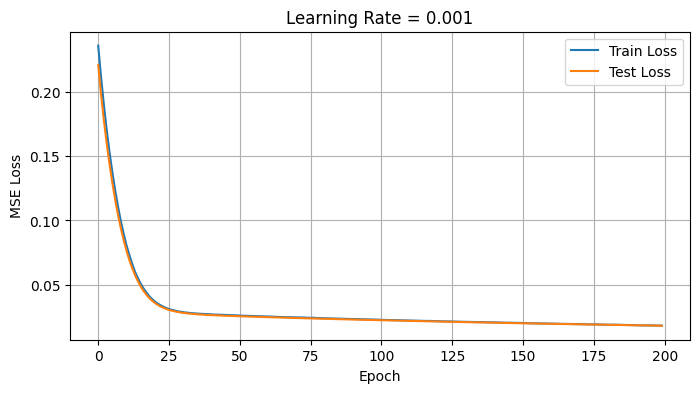

Final Train Loss: 0.017906
Final Test Loss: 0.017837


[LR=1e-08] Epoch 1 - Train Loss: 0.3212 | Test Loss: 0.3162


[LR=1e-08] Epoch 20 - Train Loss: 0.3212 | Test Loss: 0.3162


[LR=1e-08] Epoch 40 - Train Loss: 0.3213 | Test Loss: 0.3162


[LR=1e-08] Epoch 60 - Train Loss: 0.3215 | Test Loss: 0.3162


[LR=1e-08] Epoch 80 - Train Loss: 0.3218 | Test Loss: 0.3162


[LR=1e-08] Epoch 100 - Train Loss: 0.3211 | Test Loss: 0.3162


[LR=1e-08] Epoch 120 - Train Loss: 0.3213 | Test Loss: 0.3162


[LR=1e-08] Epoch 140 - Train Loss: 0.3215 | Test Loss: 0.3162


[LR=1e-08] Epoch 160 - Train Loss: 0.3214 | Test Loss: 0.3162


[LR=1e-08] Epoch 180 - Train Loss: 0.3215 | Test Loss: 0.3162


[LR=1e-08] Epoch 200 - Train Loss: 0.3211 | Test Loss: 0.3162


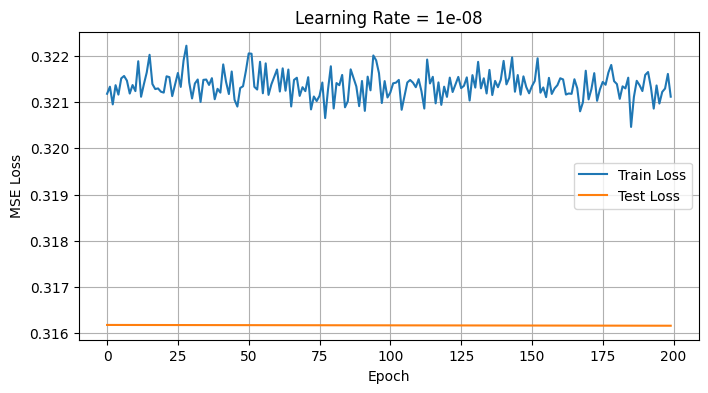

Final Train Loss: 0.321120
Final Test Loss: 0.316157


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress bar

# ----------- Sliding Window Function -----------
def sliding_window(df, window_size, stride=1):
    n = df.shape[1]
    num_samples = (df.shape[0] - window_size) // stride + 1
    data = df.values
    windows = np.lib.stride_tricks.sliding_window_view(data, (window_size, n))
    windows = windows.reshape(num_samples, window_size, n)
    return windows[::stride]

# ----------- Extract Only Perpignan Columns -----------
perpignan_columns = df_france_train_scaled.columns[df_france_train_scaled.columns.str.contains("Perpignan", case=False)]

X_train = sliding_window(df_france_train_scaled[perpignan_columns], window_size=5, stride=1)
X_test = sliding_window(df_france_test_scaled[perpignan_columns], window_size=5, stride=1)
y_train = df_france_train_scaled[perpignan_columns].iloc[4:].reset_index(drop=True)
y_test = df_france_test_scaled[perpignan_columns].iloc[4:].reset_index(drop=True)

# ----------- Convert to PyTorch Tensors (with reshape) -----------
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).reshape(X_train.shape[0], -1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).reshape(X_test.shape[0], -1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=64, shuffle=False)

# ----------- Neural Network Definition -----------
class WeatherNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(WeatherNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)

# ----------- Training Function -----------
def train_model(learning_rate):
    input_dim = X_train_tensor.shape[1]
    hidden_dim = 64
    output_dim = y_train_tensor.shape[1]

    model = WeatherNet(input_dim, hidden_dim, output_dim)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_losses, test_losses = [], []

    for epoch in range(1, 201):
        model.train()
        total_loss = 0

        # Progress bar per epoch
        loop = tqdm(train_loader, desc=f"Epoch {epoch}/200 [LR={learning_rate}]", leave=False)
        for X_batch, y_batch in loop:
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            loop.set_postfix(loss=loss.item())

        train_losses.append(total_loss / len(train_loader))

        # Evaluation on test data
        model.eval()
        with torch.no_grad():
            test_output = model(X_test_tensor)
            test_loss = criterion(test_output, y_test_tensor).item()
            test_losses.append(test_loss)

        # Print summary every few epochs
        if epoch == 1 or epoch % 20 == 0:
            print(f"[LR={learning_rate}] Epoch {epoch} - Train Loss: {train_losses[-1]:.4f} | Test Loss: {test_loss:.4f}")

    # Plotting loss curves
    plt.figure(figsize=(8, 4))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.title(f"Learning Rate = {learning_rate}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Final Train Loss: {train_losses[-1]:.6f}")
    print(f"Final Test Loss: {test_losses[-1]:.6f}")

# ----------- Train for Different Learning Rates -----------
for lr in [1.0, 1e-3, 1e-8]:
    train_model(learning_rate=lr)


[LR=1.0] Epoch 1 - Train Loss: 0.0311 | Test Loss: 0.0182


[LR=1.0] Epoch 20 - Train Loss: 0.0039 | Test Loss: 0.0025


[LR=1.0] Epoch 40 - Train Loss: 0.0023 | Test Loss: 0.0014


[LR=1.0] Epoch 60 - Train Loss: 0.0014 | Test Loss: 0.0015


[LR=1.0] Epoch 80 - Train Loss: 0.0018 | Test Loss: 0.0012


[LR=1.0] Epoch 100 - Train Loss: 0.0016 | Test Loss: 0.0008


[LR=1.0] Epoch 120 - Train Loss: 0.0008 | Test Loss: 0.0007


[LR=1.0] Epoch 140 - Train Loss: 0.0010 | Test Loss: 0.0007


[LR=1.0] Epoch 160 - Train Loss: 0.0007 | Test Loss: 0.0006


[LR=1.0] Epoch 180 - Train Loss: 0.0007 | Test Loss: 0.0007


[LR=1.0] Epoch 200 - Train Loss: 0.0007 | Test Loss: 0.0012


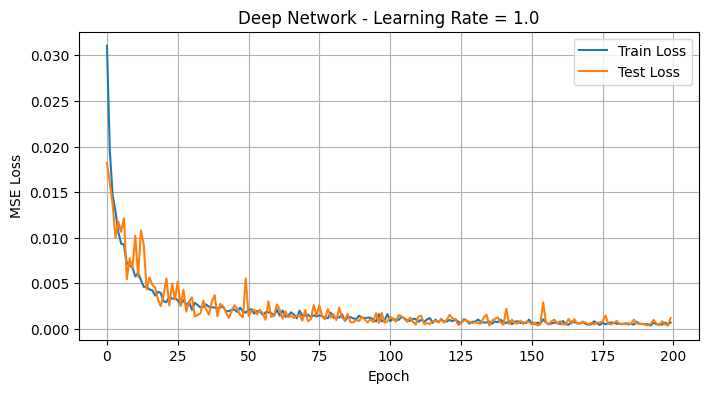

Final Train Loss: 0.000704
Final Test Loss: 0.001184


[LR=0.001] Epoch 1 - Train Loss: 0.2234 | Test Loss: 0.2160


[LR=0.001] Epoch 20 - Train Loss: 0.1244 | Test Loss: 0.1204


[LR=0.001] Epoch 40 - Train Loss: 0.0662 | Test Loss: 0.0644


[LR=0.001] Epoch 60 - Train Loss: 0.0405 | Test Loss: 0.0404


[LR=0.001] Epoch 80 - Train Loss: 0.0330 | Test Loss: 0.0336


[LR=0.001] Epoch 100 - Train Loss: 0.0311 | Test Loss: 0.0319


[LR=0.001] Epoch 120 - Train Loss: 0.0305 | Test Loss: 0.0313


[LR=0.001] Epoch 140 - Train Loss: 0.0302 | Test Loss: 0.0309


[LR=0.001] Epoch 160 - Train Loss: 0.0299 | Test Loss: 0.0306


[LR=0.001] Epoch 180 - Train Loss: 0.0296 | Test Loss: 0.0302


[LR=0.001] Epoch 200 - Train Loss: 0.0294 | Test Loss: 0.0299


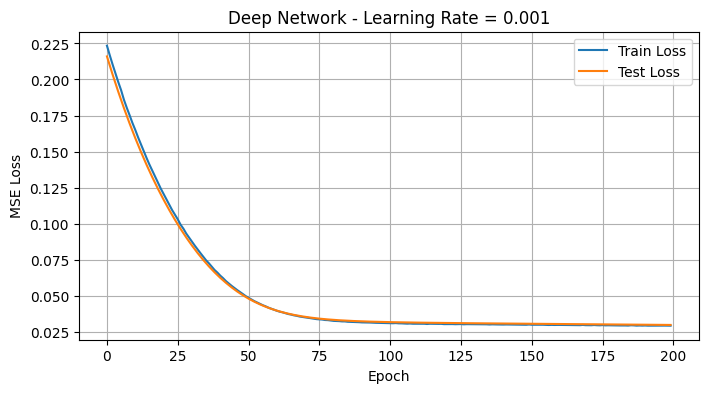

Final Train Loss: 0.029388
Final Test Loss: 0.029917


[LR=1e-08] Epoch 1 - Train Loss: 0.2436 | Test Loss: 0.2421


[LR=1e-08] Epoch 20 - Train Loss: 0.2435 | Test Loss: 0.2421


[LR=1e-08] Epoch 40 - Train Loss: 0.2437 | Test Loss: 0.2421


[LR=1e-08] Epoch 60 - Train Loss: 0.2434 | Test Loss: 0.2421


[LR=1e-08] Epoch 80 - Train Loss: 0.2432 | Test Loss: 0.2421


[LR=1e-08] Epoch 100 - Train Loss: 0.2438 | Test Loss: 0.2421


[LR=1e-08] Epoch 120 - Train Loss: 0.2436 | Test Loss: 0.2421


[LR=1e-08] Epoch 140 - Train Loss: 0.2434 | Test Loss: 0.2421


[LR=1e-08] Epoch 160 - Train Loss: 0.2432 | Test Loss: 0.2421


[LR=1e-08] Epoch 180 - Train Loss: 0.2435 | Test Loss: 0.2421


[LR=1e-08] Epoch 200 - Train Loss: 0.2431 | Test Loss: 0.2421


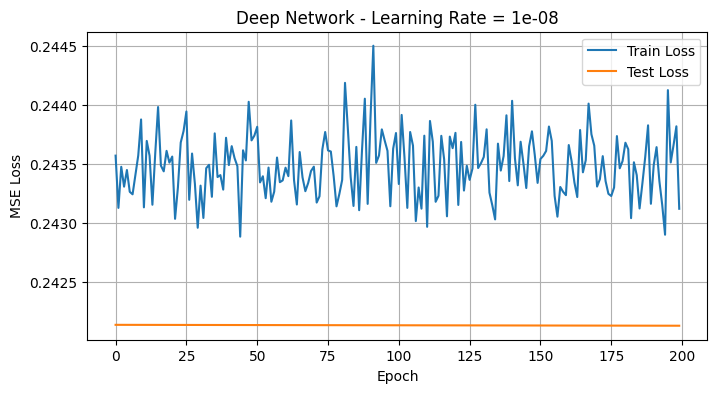

Final Train Loss: 0.243117
Final Test Loss: 0.242125


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define deeper neural network with 3 hidden layers
class DeepWeatherNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DeepWeatherNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )

    def forward(self, x):
        return self.model(x)

# Training function for the deeper model
def train_deep_model(learning_rate):
    input_dim = X_train_tensor.shape[1]
    output_dim = y_train_tensor.shape[1]
    model = DeepWeatherNet(input_dim, output_dim)

    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_losses = []
    test_losses = []

    for epoch in range(1, 201):
        model.train()
        total_loss = 0

        # Progress bar for batches in current epoch
        loop = tqdm(train_loader, desc=f"Epoch {epoch}/200 [LR={learning_rate}]", leave=False)
        for X_batch, y_batch in loop:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            loop.set_postfix(loss=loss.item())

        train_losses.append(total_loss / len(train_loader))

        # Evaluate on test set
        model.eval()
        with torch.no_grad():
            y_test_pred = model(X_test_tensor)
            test_loss = criterion(y_test_pred, y_test_tensor).item()
            test_losses.append(test_loss)

        # Print progress summary
        if epoch == 1 or epoch % 20 == 0:
            print(f"[LR={learning_rate}] Epoch {epoch} - Train Loss: {train_losses[-1]:.4f} | Test Loss: {test_loss:.4f}")

    # Plot loss curves
    plt.figure(figsize=(8, 4))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.title(f"Deep Network - Learning Rate = {learning_rate}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Final report
    print(f"Final Train Loss: {train_losses[-1]:.6f}")
    print(f"Final Test Loss: {test_losses[-1]:.6f}")

# Train the deeper model with 3 different learning rates
for lr in [1.0, 1e-3, 1e-8]:
    train_deep_model(learning_rate=lr)


Tracking weights for learning rate 1.0
Tracking weights for learning rate 0.001
Tracking weights for learning rate 1e-08


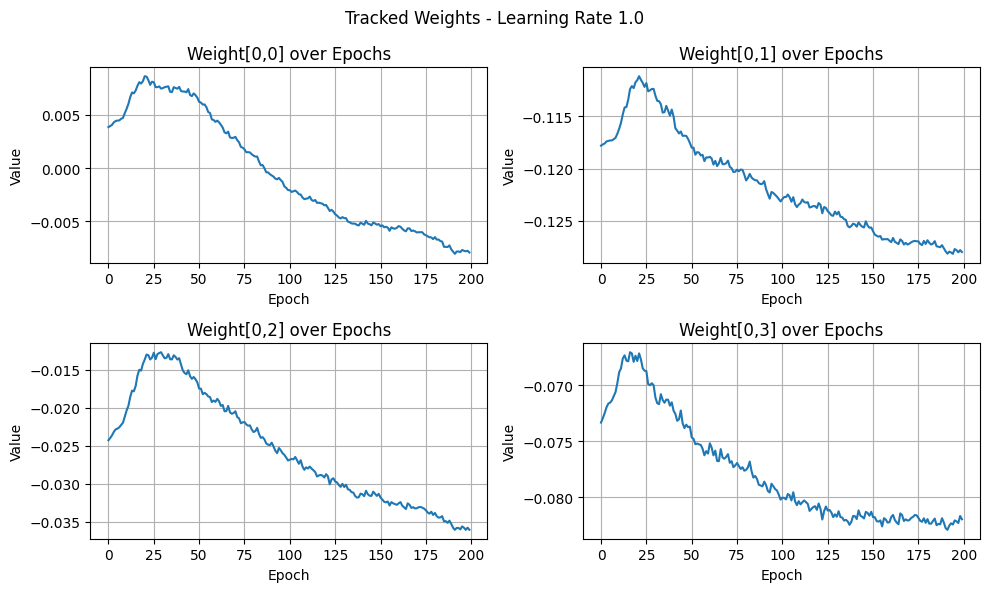

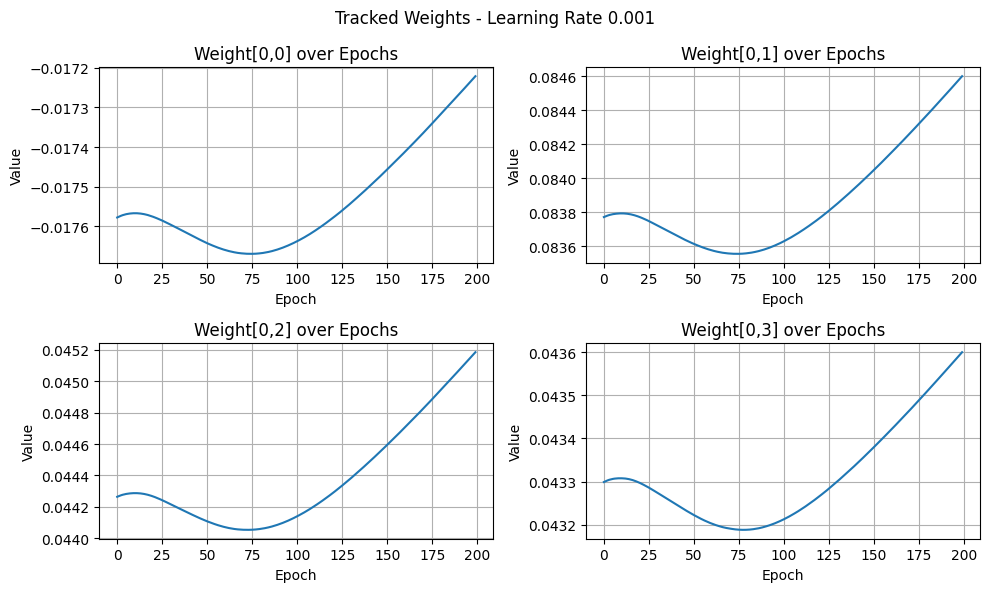

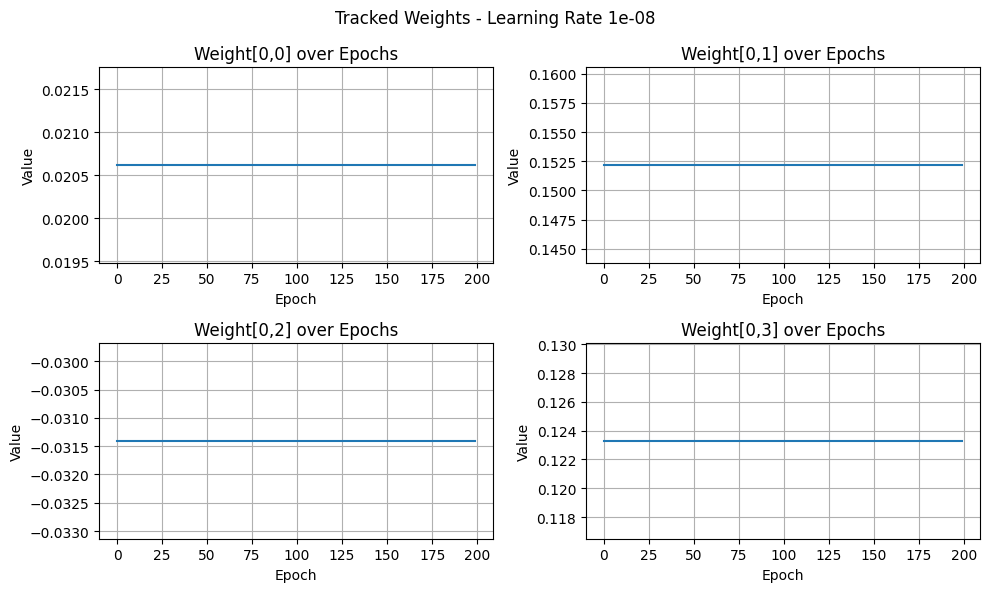

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to train model and return weight history
def track_weights_during_training(lr):
    input_dim = X_train_tensor.shape[1]
    output_dim = y_train_tensor.shape[1]
    model = DeepWeatherNet(input_dim, output_dim)

    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    weight_history = []

    for epoch in range(1, 201):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            w = model.model[0].weight.data.cpu().numpy()
            weight_history.append([w[0, 0], w[0, 1], w[0, 2], w[0, 3]])

    return np.array(weight_history)

# Run for 3 learning rates
lrs = [1.0, 1e-3, 1e-8]
all_weight_histories = []

for lr in lrs:
    print(f"Tracking weights for learning rate {lr}")
    weight_hist = track_weights_during_training(lr)
    all_weight_histories.append(weight_hist)

# Plot results
for i, lr in enumerate(lrs):
    weights = all_weight_histories[i]
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))
    axs = axs.flatten()
    for j in range(4):
        axs[j].plot(weights[:, j])
        axs[j].set_title(f"Weight[0,{j}] over Epochs")
        axs[j].set_xlabel("Epoch")
        axs[j].set_ylabel("Value")
        axs[j].grid(True)
    plt.suptitle(f"Tracked Weights - Learning Rate {lr}")
    plt.tight_layout()
    plt.show()
